In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.cluster as clu

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
np.random.seed(666)



In [2]:
#Kmeans clustering function

def Kmeans_clustering( df, k, iterations):
    #df = the dataset as a dataframe
    # k = number of clusters
    #number of iterations

    # =============================================================================
    # 1: Select centroids
    # =============================================================================

    def select_centroids(df, k):
        centroids = df.sample(n=k, replace=False)
        return centroids

    # =============================================================================
    # 2: kmeans
    # =============================================================================

    def get_closest_cluster(row):
        distances = []

        for centroid in centroids.values:
            distances.append(np.linalg.norm(centroid - row))
        return distances.index(min(distances)) + 1

    centroids = select_centroids(df, k)

    df['closest'] = df.apply(get_closest_cluster, axis=1)


    # =============================================================================
    # 3: looping
    # =============================================================================

    for it in range(iterations):
        print(it) 
        new_centroids = []
        for i in range(1,k+1):

            cluster_data = df[df['closest'] == i].iloc[:,:-1]
            new_centroids.append(np.mean(cluster_data, axis=0))
            #compute the mean of the cluster which is the new centroids

        print(new_centroids)
        centroids= pd.DataFrame(new_centroids)
        #set new centroids as centroids to use in iteration
        #print("centroids:" + centroids)
        print(df)
        df['closest'] = df.iloc[:,:-1].apply(get_closest_cluster, axis=1)
        #update closest cluster column with the new clostest cluster
        print(df)

        sb.scatterplot(data = df, x = 0, y = 1, hue='closest')
        sb.scatterplot(data = centroids, x = 0, y = 1, color= 'red')
        #update 0 and 1 in both lines above to see the plot (line 1) and the centroids (line 2) 
        #for the dimensions you want to compare

        plt.show()



## Iris dataset
### Kmeans clustering

0
[0    6.027660
1    2.823404
2    4.448936
3    1.412766
dtype: float64, 0    6.680000
1    3.008889
2    5.633333
3    2.064444
dtype: float64, 0    5.044828
1    3.284483
2    1.743103
3    0.355172
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        2
146  6.3  2.5  5.0  1.9        2
147  6.5  3.0  5.2  2.0        2
148  6.2  3.4  5.4  2.3        2
149  5.9  3.0  5.1  1.8        2

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        2
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        2
148  6.2  3.4  5.4  2.3        

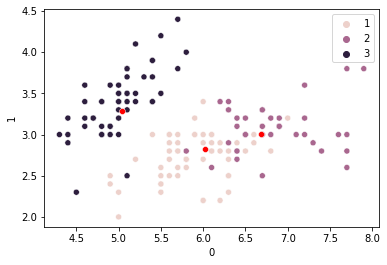

1
[0    5.916667
1    2.751667
2    4.405000
3    1.423333
dtype: float64, 0    6.823077
1    3.066667
2    5.725641
3    2.079487
dtype: float64, 0    5.007843
1    3.409804
2    1.492157
3    0.262745
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        2
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        2
148  6.2  3.4  5.4  2.3        2
149  5.9  3.0  5.1  1.8        1

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        2
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        2
148  6.2  3.4  5.4  2.3        

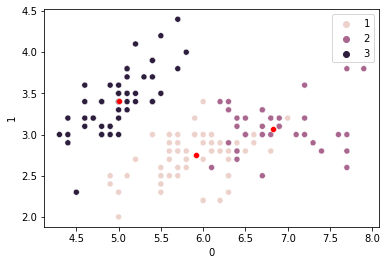

2
[0    5.901613
1    2.748387
2    4.393548
3    1.433871
dtype: float64, 0    6.850000
1    3.073684
2    5.742105
3    2.071053
dtype: float64, 0    5.006
1    3.428
2    1.462
3    0.246
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        2
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        2
148  6.2  3.4  5.4  2.3        2
149  5.9  3.0  5.1  1.8        1

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        2
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        2
148  6.2  3.4  5.4  2.3        2
149  5.9  

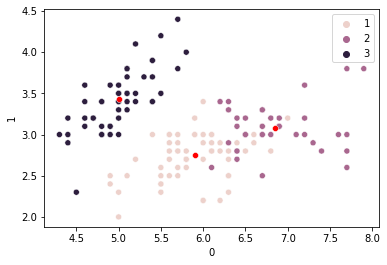

In [3]:
# Perform Kmeans clustering on the iris dataset
iris_x = load_iris()['data']
df = pd.DataFrame(data=iris_x)
#number of clusters
k = 3
#number of iterations
iterations = 3

Kmeans_clustering(df, 3, 3)

### PSO clustering

0
[0    6.262
1    2.872
2    4.906
3    1.676
dtype: float64, 0    4.825926
1    3.166667
2    1.466667
3    0.214815
dtype: float64, 0    5.217391
1    3.734783
2    1.456522
3    0.282609
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        1
149  5.9  3.0  5.1  1.8        1

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        1
149  5.9  

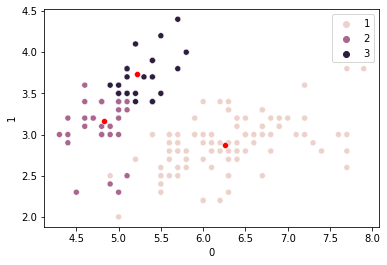

1
[0    6.301031
1    2.886598
2    4.958763
3    1.695876
dtype: float64, 0    4.782759
1    3.082759
2    1.620690
3    0.303448
dtype: float64, 0    5.275000
1    3.716667
2    1.487500
3    0.275000
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        1
149  5.9  3.0  5.1  1.8        1

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        

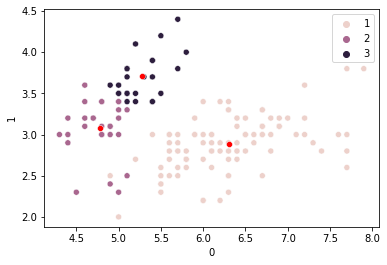

2
[0    6.301031
1    2.886598
2    4.958763
3    1.695876
dtype: float64, 0    4.771429
1    3.071429
2    1.625000
3    0.307143
dtype: float64, 0    5.268
1    3.704
2    1.488
3    0.272
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        1
149  5.9  3.0  5.1  1.8        1

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        1
149  5.9  

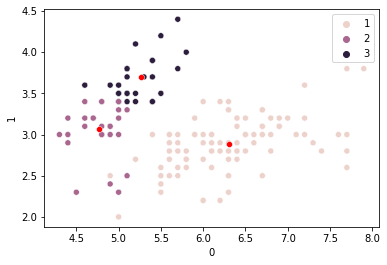

In [4]:
#PSO clustering on the Iris dataset
iris_x = load_iris()['data']

df = pd.DataFrame(data=iris_x)

#number of clusters
k = 3
#number of iterations
iterations = 3

# =============================================================================
# 1: Select centroids
# =============================================================================

def select_centroids(df, k):
    centroids = df.sample(n=k, replace=False)
    return centroids

# =============================================================================
# 2: kmeans
# =============================================================================

def get_closest_cluster(row):
    distances = []
    
    for centroid in centroids.values:
        distances.append(np.linalg.norm(centroid - row))
    return distances.index(min(distances)) + 1

centroids = select_centroids(df, k)

df['closest'] = df.apply(get_closest_cluster, axis=1)


# =============================================================================
# 3: looping
# =============================================================================

for it in range(iterations):
    print(it) 
    new_centroids = []
    for i in range(1,k+1):
        
        cluster_data = df[df['closest'] == i].iloc[:,:-1]
        new_centroids.append(np.mean(cluster_data, axis=0))
        #compute the mean of the cluster which is the new centroids
    
    print(new_centroids)
    centroids= pd.DataFrame(new_centroids)
    #set new centroids as centroids to use in iteration
    #print("centroids:" + centroids)
    print(df)
    df['closest'] = df.iloc[:,:-1].apply(get_closest_cluster, axis=1)
    #update closest cluster column with the new clostest cluster
    print(df)

    sb.scatterplot(data = df, x = 0, y = 1, hue='closest')
    sb.scatterplot(data = centroids, x = 0, y = 1, color= 'red')
    #update 0 and 1 in both lines above to see the plot (line 1) and the centroids (line 2) 
    #for the dimensions you want to compare
    
    plt.show()



## Artificial 1 dataset

In [5]:
# Creating the "Artificial 1" dataset as described in the paper Data Clustering using Particle Swarm Optimization
artf_x = np.random.rand(400, 2)
artf_y = []

for values in artf_x:
    if values[0] >= 0.7:
        artf_y.append(1)
    elif values[0] <= 0.3 and values[1]>= -values[1]-0.2:
        artf_y.append(1)
    else:
        artf_y.append(0)

### Kmeans clustering

0
[0    0.535476
1    0.729318
dtype: float64, 0    0.466892
1    0.247842
dtype: float64]
            0         1  closest
0    0.689154  0.979297        1
1    0.861248  0.854707        1
2    0.552028  0.423649        2
3    0.183258  0.420186        2
4    0.679106  0.322928        2
..        ...       ...      ...
395  0.227465  0.259312        2
396  0.968816  0.486736        1
397  0.649122  0.736167        1
398  0.801119  0.155276        2
399  0.787752  0.599706        1

[400 rows x 3 columns]
            0         1  closest
0    0.689154  0.979297        1
1    0.861248  0.854707        1
2    0.552028  0.423649        2
3    0.183258  0.420186        2
4    0.679106  0.322928        2
..        ...       ...      ...
395  0.227465  0.259312        2
396  0.968816  0.486736        1
397  0.649122  0.736167        1
398  0.801119  0.155276        2
399  0.787752  0.599706        1

[400 rows x 3 columns]


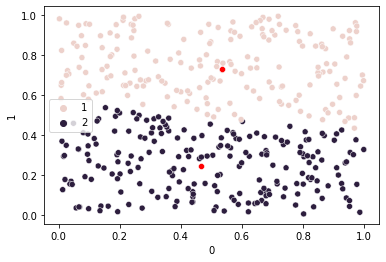

1
[0    0.512242
1    0.749659
dtype: float64, 0    0.490832
1    0.254849
dtype: float64]
            0         1  closest
0    0.689154  0.979297        1
1    0.861248  0.854707        1
2    0.552028  0.423649        2
3    0.183258  0.420186        2
4    0.679106  0.322928        2
..        ...       ...      ...
395  0.227465  0.259312        2
396  0.968816  0.486736        1
397  0.649122  0.736167        1
398  0.801119  0.155276        2
399  0.787752  0.599706        1

[400 rows x 3 columns]
            0         1  closest
0    0.689154  0.979297        1
1    0.861248  0.854707        1
2    0.552028  0.423649        2
3    0.183258  0.420186        2
4    0.679106  0.322928        2
..        ...       ...      ...
395  0.227465  0.259312        2
396  0.968816  0.486736        1
397  0.649122  0.736167        1
398  0.801119  0.155276        2
399  0.787752  0.599706        1

[400 rows x 3 columns]


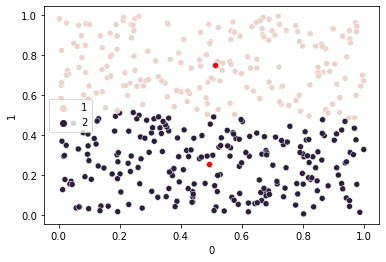

2
[0    0.501405
1    0.754875
dtype: float64, 0    0.500360
1    0.257277
dtype: float64]
            0         1  closest
0    0.689154  0.979297        1
1    0.861248  0.854707        1
2    0.552028  0.423649        2
3    0.183258  0.420186        2
4    0.679106  0.322928        2
..        ...       ...      ...
395  0.227465  0.259312        2
396  0.968816  0.486736        1
397  0.649122  0.736167        1
398  0.801119  0.155276        2
399  0.787752  0.599706        1

[400 rows x 3 columns]
            0         1  closest
0    0.689154  0.979297        1
1    0.861248  0.854707        1
2    0.552028  0.423649        2
3    0.183258  0.420186        2
4    0.679106  0.322928        2
..        ...       ...      ...
395  0.227465  0.259312        2
396  0.968816  0.486736        2
397  0.649122  0.736167        1
398  0.801119  0.155276        2
399  0.787752  0.599706        1

[400 rows x 3 columns]


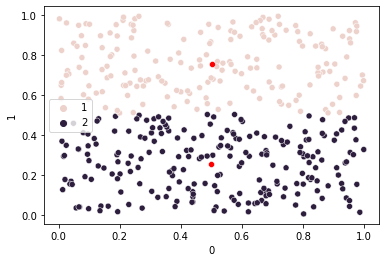

In [6]:
#set dataset, number of clusters and number of iterations
df = pd.DataFrame(data=artf_x)
k = 2
iterations = 3
Kmeans_clustering(df, 2, 3)


## PSO clustering

# Excercise 4
#### Figure 1 shows a (toy) problem instance for the 2-cardinality tree problem. The 2-cardinality tree problem amounts to finding a subtree T of a given undirected graph G with exactly 2 edges and the minimum possible weight.

## 4.a 
#### Is ACO for this problem a Competition-Balanced System (CBS)? Justify your answer.


ACO for this problem is not a competition balanced system. This is because not all c in C where C is the set of solution components occur in the same number of feasible solutions.

A feasible solution is described by Blum, Christian, and Marco Dorigo as "A feasible solution is a complete assignment (i.e., an assignment in which each decision variable has a domain value assigned) that satisfies the constraints". 

A solution for this problem consists of 2 variables: edge A and edge B which both have a domain value assigned to them (the edge weight. 

In figure 1, we have three solutions: 1-2-3 with a weight of 3, 2-3-4 with a weight of 4 and 3-4-5 with a weight of 3. All of these solutions are feasible solutions, because they all have a value that falls within the domain which is the domain fo the natural numbers for this problem. 

For any feasible partial solution we take, we can form one of these three solutions, since a partial solution consists of one edge, and we are allowed to add one more edge to complete the solution. 

In the slides, a Competition-balanced system is described as: "An ACO and a problem instance are Competition Balanced System (CBS) if given a feasible partial solution Sp and the set C of solution components that can be added to extend Sp, all c in C occur in the same number of feasible solutions"

As we can see, 3 occurs in 3 solutions, 2 and 4 occur in 2 solutions and 1 and 5 occur in one solution. Thus not all c occur in the same number of feasible solutions, and thus the problem is not competition balanced. 